In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



itsal = pd.read_csv('C:/Users/user/Desktop/Bootcamp/ITsalary2020.csv')
itsal.head()

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/user/Desktop/Bootcamp/ITsalary2020.csv'

In [ ]:
#counting the rows and collumns
itsal.shape

(1253, 23)

In [ ]:
#checking for nul values
itsal.isna().sum()

Timestamp                                                                                                                    0
Age                                                                                                                         27
Gender                                                                                                                      10
City                                                                                                                         0
Position                                                                                                                     6
Total years of experience                                                                                                   16
Years of experience in Germany                                                                                              32
Seniority level                                                                                                

The null/empty entries are not significant for most of the variables given that the population is 1,253. If need be, the null entries can be deleted when one performs analysis on the desired variable

In [ ]:
#Understanding the age of the survey respondents
itsal['Age'].describe()

count    1226.000000
mean       32.509788
std         5.663804
min        20.000000
25%        29.000000
50%        32.000000
75%        35.000000
max        69.000000
Name: Age, dtype: float64

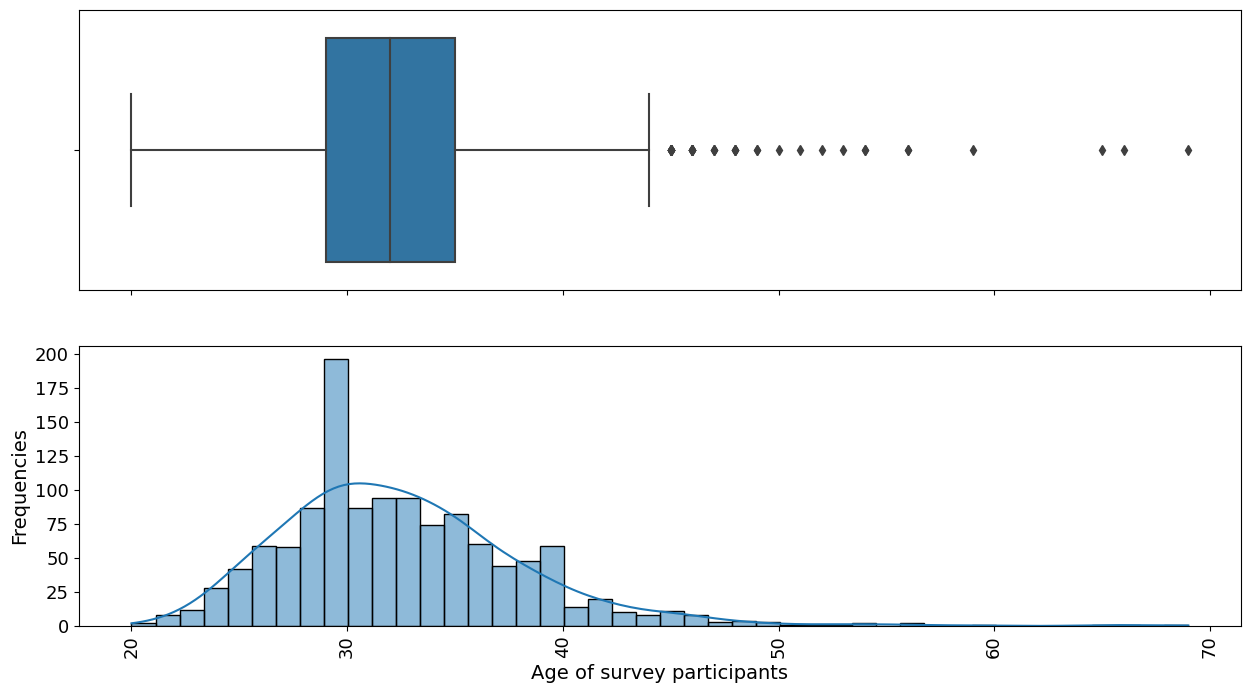

In [ ]:
#Graphing the ages
fig, (ax_box,ax_hist) = plt.subplots(2,sharex=True,figsize=(15,8))

sns.boxplot(data=itsal,x='Age',ax=ax_box)
ax_box.set(xlabel="")
sns.histplot(data=itsal,x='Age',kde=True,ax=ax_hist)

plt.xticks(fontsize=13,rotation=90)
plt.xlabel("Age of survey participants",fontsize=14)
plt.yticks(fontsize=13)
plt.ylabel("Frequencies",fontsize=14)
plt.show()

In [ ]:
#Cities
itsal["City"].describe()

count       1253
unique       119
top       Berlin
freq         681
Name: City, dtype: object

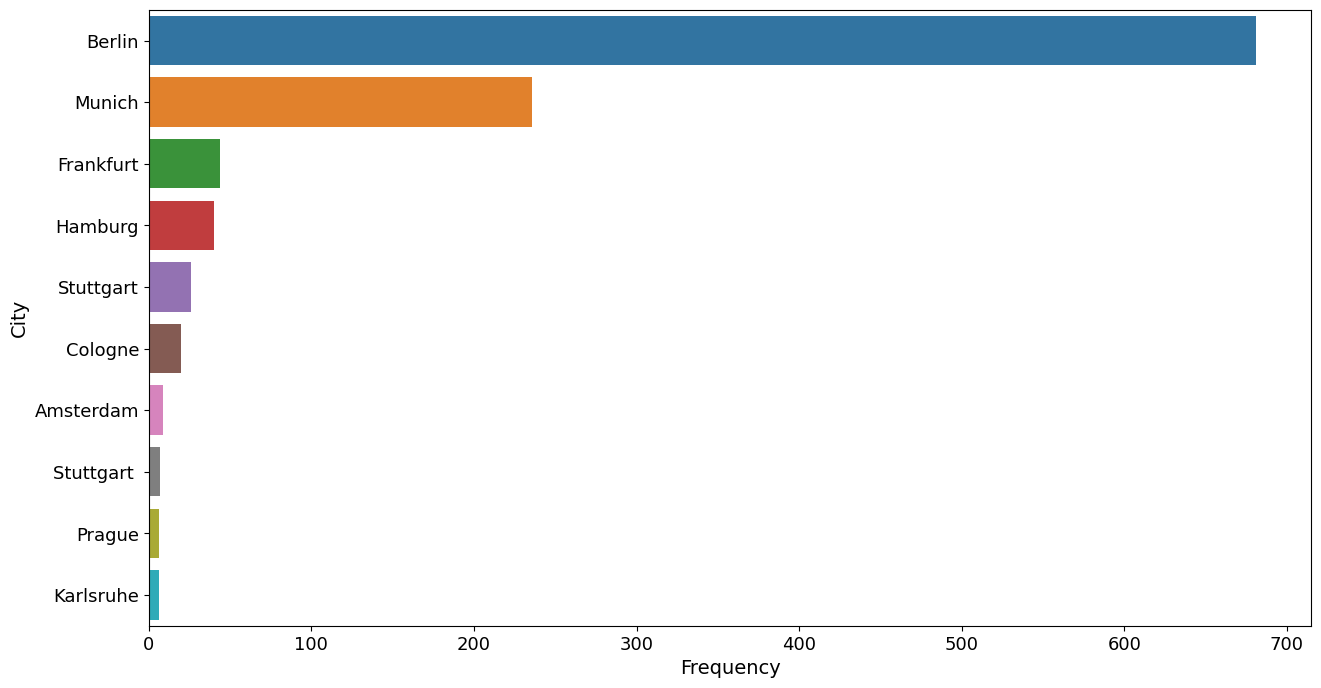

In [ ]:
#Cities the respondents are from
plt.figure(figsize=(15,8))
sns.barplot(data=itsal['City'].value_counts().head(10).reset_index(),
        y='index',x='City')
plt.xticks(fontsize=13)
plt.xlabel("Frequency",fontsize=14)
plt.yticks(fontsize=13)
plt.ylabel("City",fontsize=14)
plt.show()

Evidently, most of the respondents are from Germany, with Berlin producing most of the respondents. A total of 119 cities featured in the survey

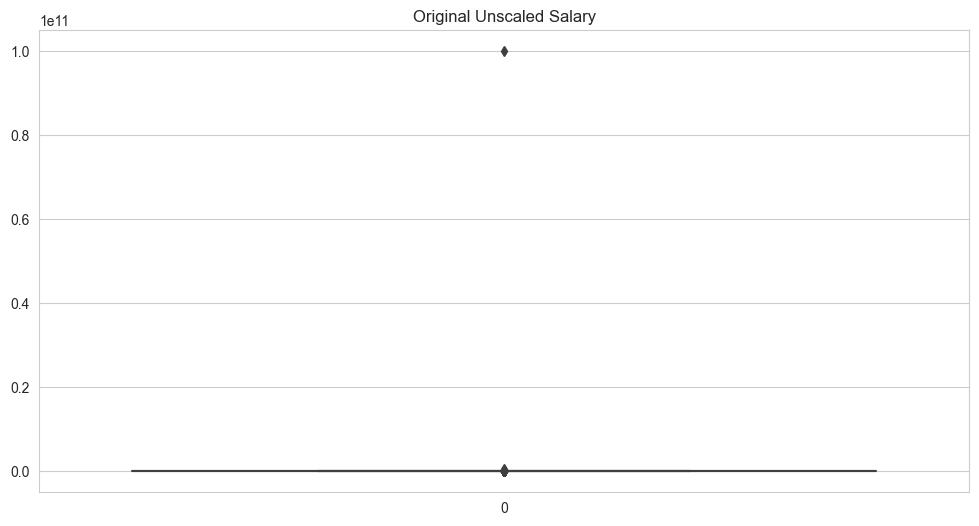

In [ ]:
#salaries age correlation
sal=itsal['Yearly brutto salary (without bonus and stocks) in EUR']
sns.set_style('whitegrid')
plt.figure(figsize=(12,6))
sns.boxplot(sal)
plt.title("Original Unscaled Salary")
plt.show()

The plot is non-informative, thus the need to obtain logs to determine whethere there are significant outliers

Text(0.5, 1.0, 'Scaled Salary (log10)')

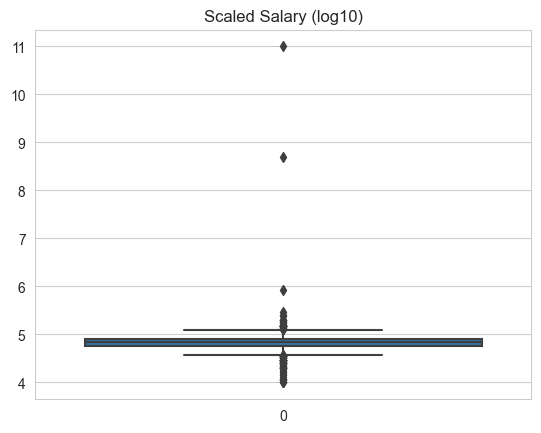

In [ ]:
sns.boxplot(np.log10(sal))
plt.title("Scaled Salary (log10)")

The detected outliers ought to be removed since they are extreme (even when the logs are considered, inidcating their ability to affect the mean figures)

In [ ]:
#Using the interquartile range principle to remove the outliers
feature = 'Yearly brutto salary (without bonus and stocks) in EUR'
p25 = itsal[feature].quantile(0.25)
p75 = itsal[feature].quantile(0.75)
iqr = p75 - p25

upper_limit = p75 + 1.5 * iqr
lower_limit = p25 - 1.5 * iqr

#New dataframe without the outliers:
new_df = itsal[(itsal[feature] > lower_limit) & (itsal[feature] < upper_limit)]

#checking the number of dropped outliers
diff = itsal.shape[0] - new_df.shape[0] # 82 outliers were removed

diff


82

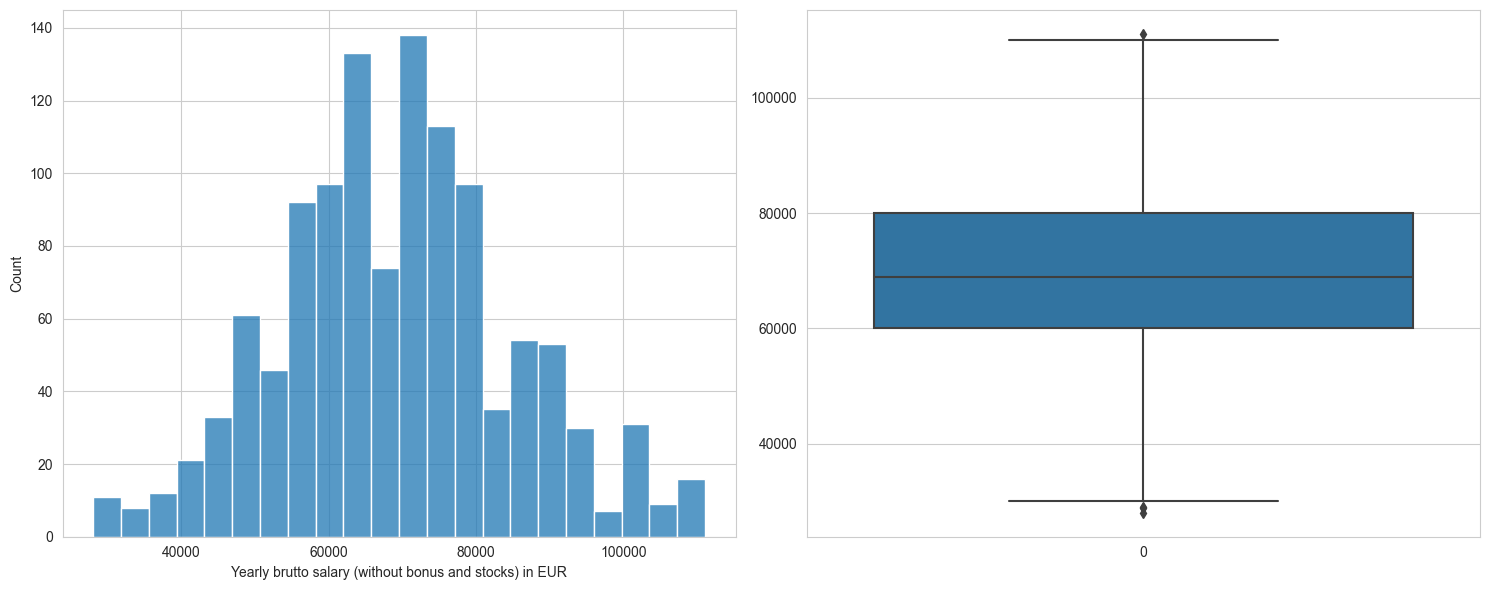

In [ ]:
#Data without the outliers
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,6))

sns.histplot(new_df[feature], ax=ax1)
sns.boxplot(new_df[feature],ax=ax2)

plt.tight_layout()
plt.show()

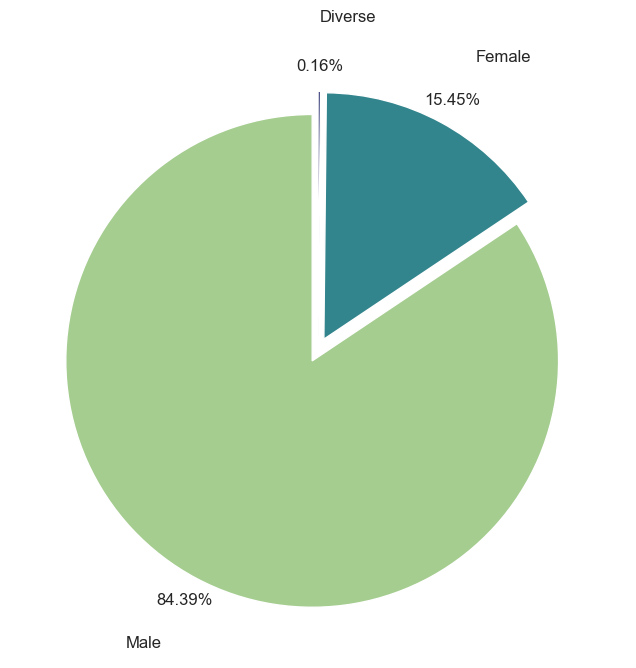

In [ ]:
#Gender analysis
plt.figure(figsize=(15,8))

itsal['Gender'].value_counts().plot.pie(autopct="%1.2f%%",fontsize=12,
startangle=90,cmap='crest',explode=[0.05] * 3,pctdistance=1.1,
labeldistance=1.3,textprops={'fontsize': 15})
plt.ylabel("")
plt.show()

In [ ]:
#Replacing 'nan' with 'Not Specified'
new_df[[feature]] = new_df[[feature]].fillna(value='Not Specified')


C:\Users\user\AppData\Local\Temp\ipykernel_17836\1380053404.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df[[feature]] = new_df[[feature]].fillna(value='Not Specified')


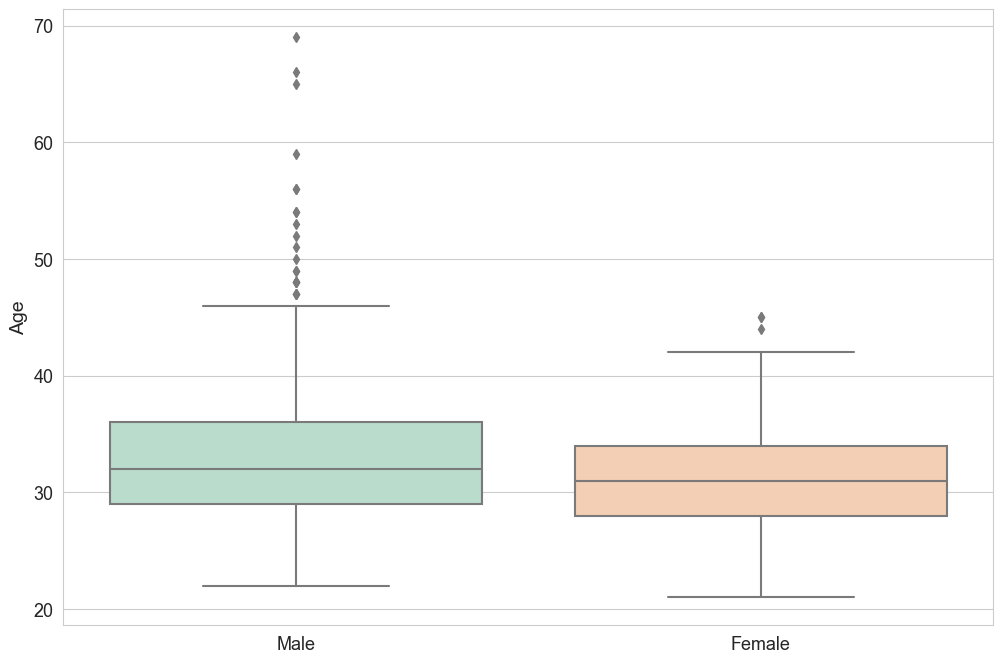

In [ ]:
#Gender vs age boxplot
plt.figure(figsize=(12,8))
sns.boxplot(x='Gender',y='Age',data=new_df,palette='Pastel2')
plt.xticks(fontsize=13)
plt.xlabel("")
plt.yticks(fontsize=13)
plt.ylabel("Age",fontsize=14)
plt.show()

From the plots, the male median age is higher than that of the females.

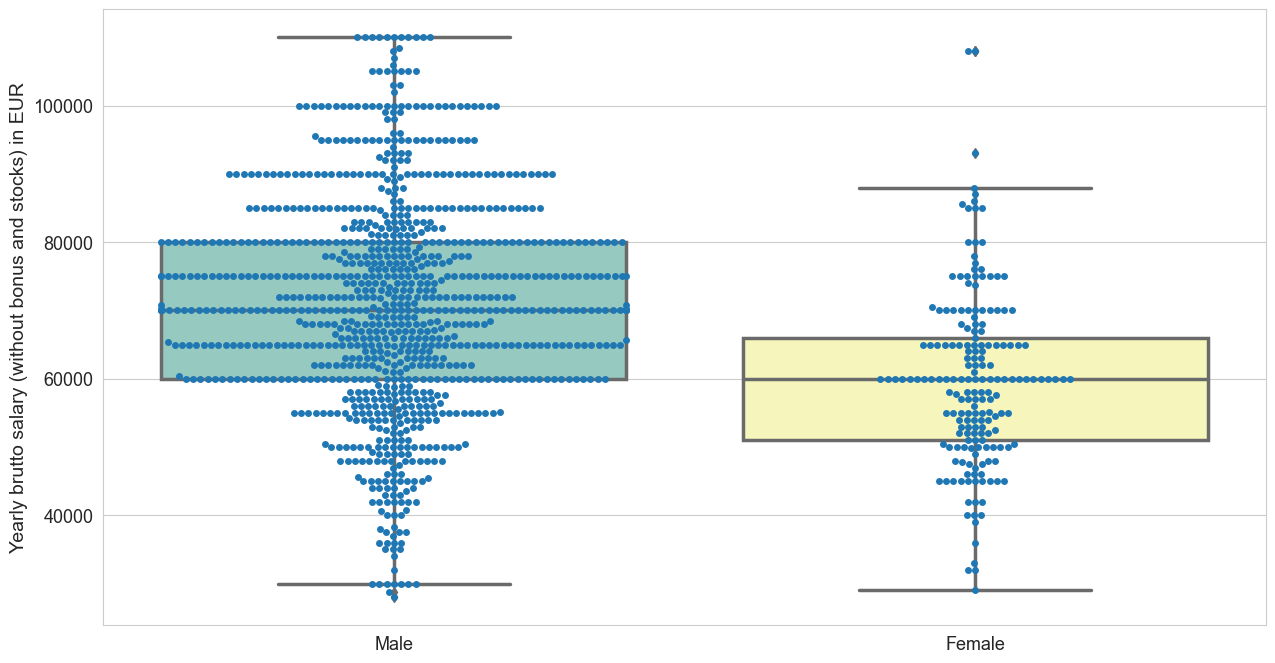

In [ ]:
#Salary by gender
salary = 'Yearly brutto salary (without bonus and stocks) in EUR'

plt.figure(figsize=(15,8)) 
ax = sns.boxplot(x='Gender',y=salary,data=new_df,palette='Set3',linewidth=2.5)
ax = sns.swarmplot(x='Gender',y=salary,data=new_df)

plt.xticks(fontsize=13)
plt.xlabel("")
plt.yticks(fontsize=13)
plt.ylabel(salary,fontsize=14)
plt.show()

Male respondents seem to earn more than their female counterparts

In [ ]:
#Speciality analysis
top_position = itsal['Position '].value_counts()
top_position

Software Engineer            387
Backend Developer            174
Data Scientist               110
Frontend Developer            89
QA Engineer                   71
                            ... 
Testautomation                 1
Recruiter                      1
DBA                            1
DB developer/Data analyst      1
IT Operations Manager          1
Name: Position , Length: 148, dtype: int64

In [ ]:
#Average salary per speciality/position
position_earning = itsal['Yearly brutto salary (without bonus and stocks) in EUR'].groupby(itsal['Position ']).sum()
avr_earning = (position_earning/ itsal['Position '].value_counts()).sort_values(ascending = False)
avr_earning


ML Engineer                    1.197299e+07
Freelance AI lead / advisor    2.000000e+05
Manager                        1.800000e+05
Software Sales                 1.500000e+05
ERP Consultant                 1.300000e+05
                                   ...     
Beikoch                        3.000000e+04
XR Developer                   2.500000e+04
computer vision researcher     2.300000e+04
working student (QA)           1.200000e+04
HiWi                           1.016400e+04
Length: 148, dtype: float64

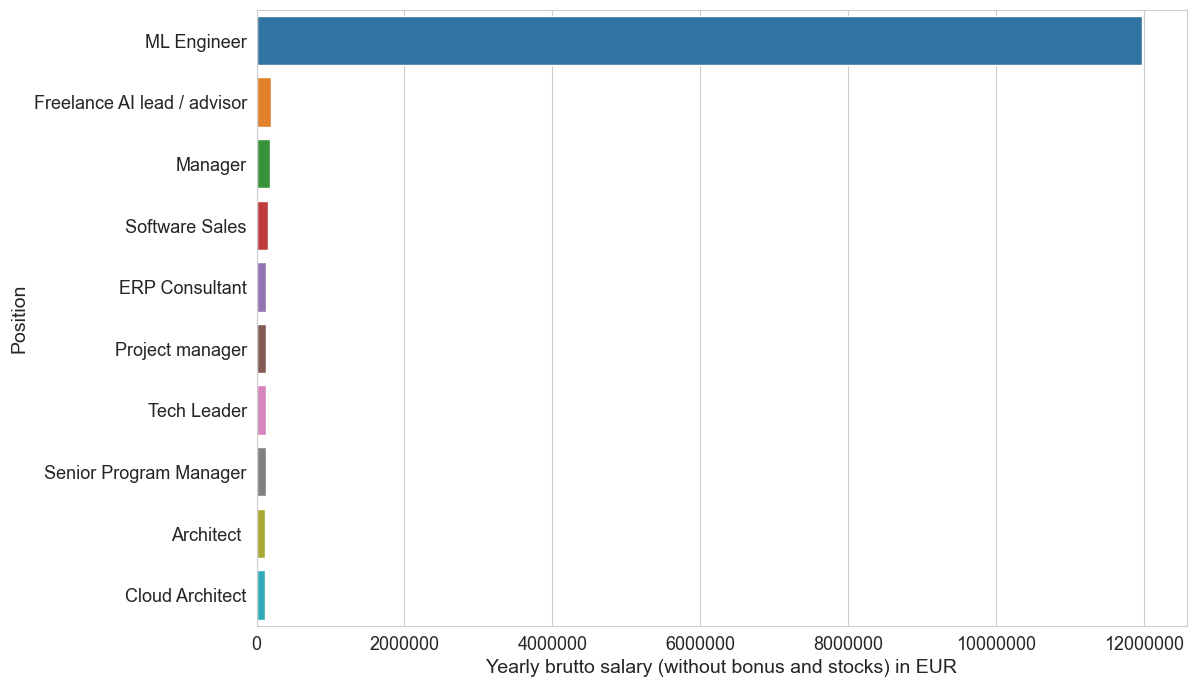

In [ ]:
#Gaphing the top 10 average jobs/title
top_10_paying = avr_earning[:10]
top_10_paying= top_10_paying.to_frame()
plt.figure(figsize=(12,8))
sns.barplot(data=top_10_paying, x= avr_earning[:10], y= avr_earning.index[:10])

plt.ticklabel_format(style='plain', axis='x')
plt.xticks(fontsize=13)
plt.xlabel("Yearly brutto salary (without bonus and stocks) in EUR",fontsize=14)
plt.yticks(fontsize=13)
plt.ylabel("Position",fontsize=14)
plt.show()

Removing the ML variable since it is significantly higher than the rest to review how the other nine relate:

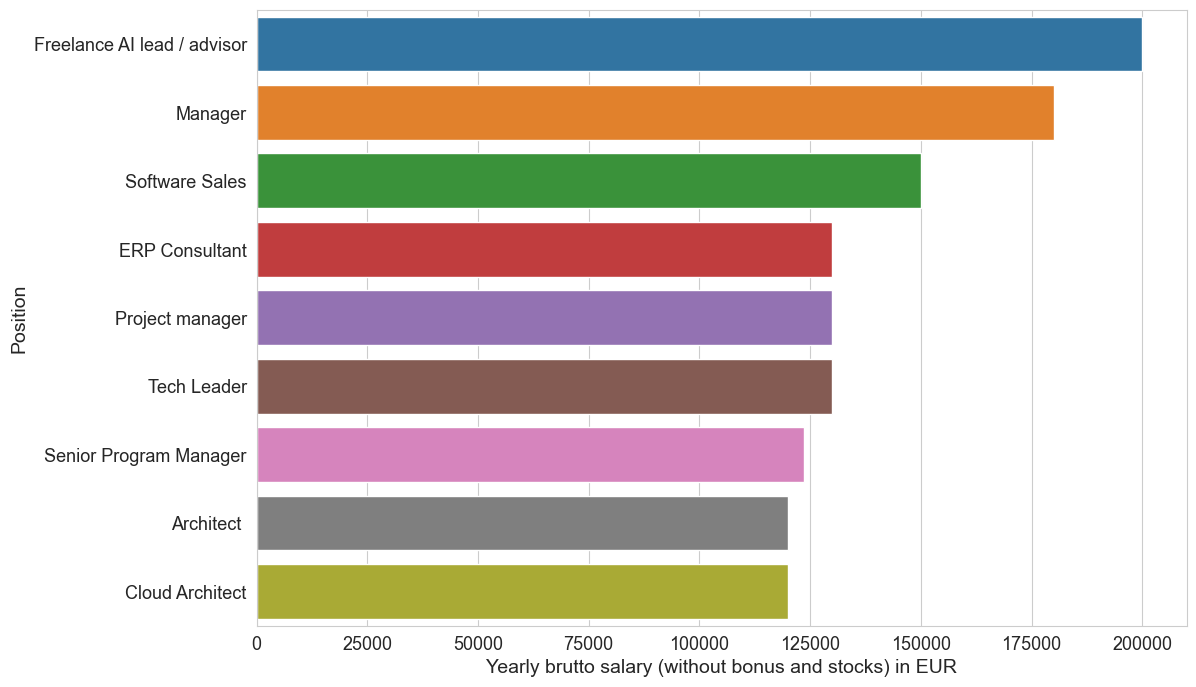

In [ ]:
plt.figure(figsize=(12,8))
sns.barplot(data=top_10_paying, x= avr_earning[1:10], y= avr_earning.index[1:10])

plt.ticklabel_format(style='plain', axis='x')
plt.xticks(fontsize=13)
plt.xlabel("Yearly brutto salary (without bonus and stocks) in EUR",fontsize=14)
plt.yticks(fontsize=13)
plt.ylabel("Position",fontsize=14)
plt.show()

In [ ]:
#Checking the popularity of programming languages among respondents
#Checking main technologies
tech_df = itsal.copy()
tech_df['Your main technology / programming language'] = tech_df['Your main technology / programming language'].str.lower()
tech_df['Your main technology / programming language'] = tech_df['Your main technology / programming language'].str.strip()

#Tech with the highest salaries
top_tech_sal = tech_df['Yearly brutto salary (without bonus and stocks) in EUR'].groupby(
            tech_df['Your main technology / programming language']).sum().sort_values(ascending=False).index.to_list()[1:15]
top_tech_sal

['python',
 'java',
 'javascript',
 'php',
 'c++',
 'c#',
 'go',
 'scala',
 'swift',
 'typescript',
 'kotlin',
 '.net',
 'ruby',
 'sql']

Julia had the highest salary without bonuses of the top 15. As a result, it was excluded from the analysis by having the other 14 entries plotted in the below boxplots:
NB: Removing outliers would have removed this need

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


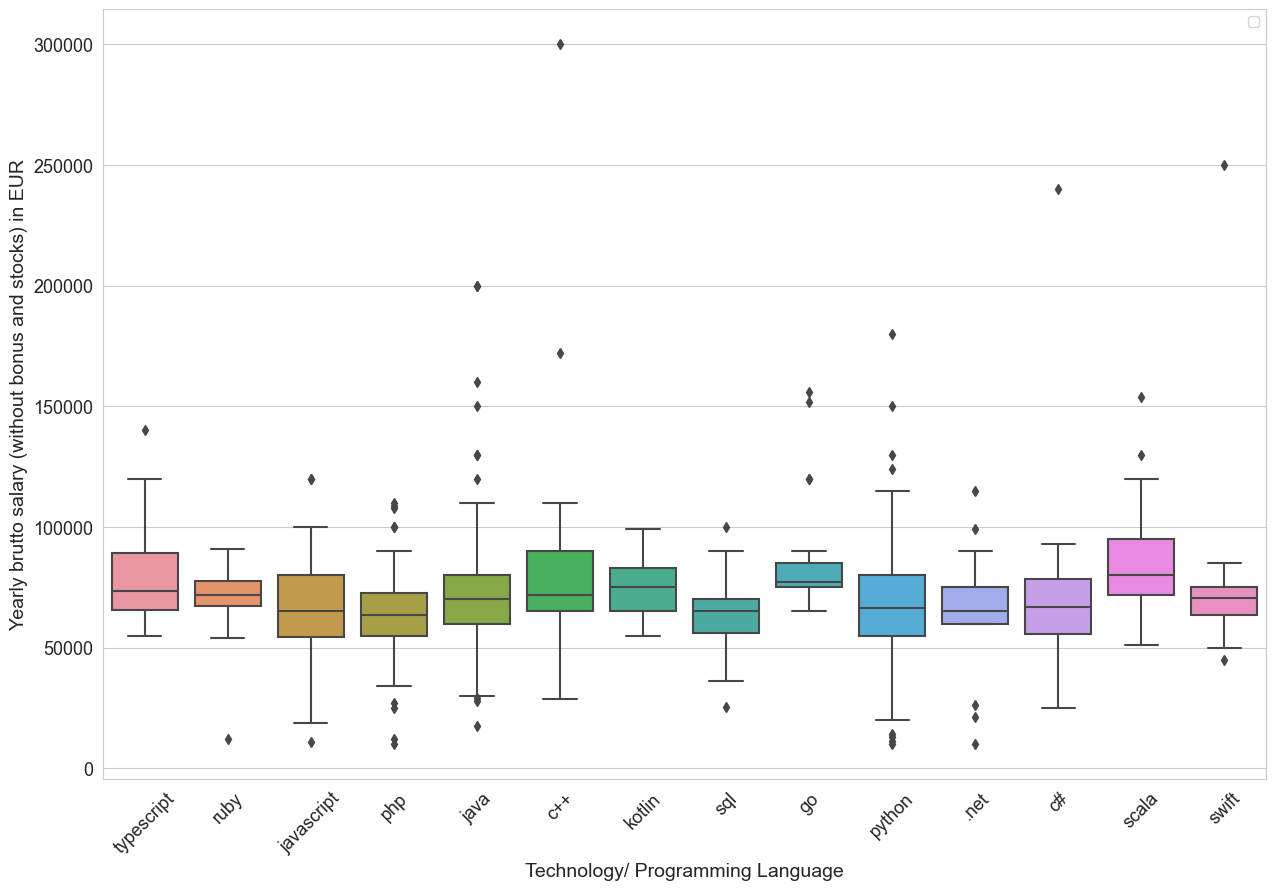

In [ ]:
data = tech_df[tech_df['Your main technology / programming language'].isin(top_tech_sal)]

plt.figure(figsize=(15,10))
sns.boxplot(data=data,y='Yearly brutto salary (without bonus and stocks) in EUR',
           x='Your main technology / programming language')
plt.legend()
plt.xticks(rotation=45,fontsize=13)
plt.xlabel('Technology/ Programming Language',fontsize=14)
plt.yticks(fontsize=13)
plt.ylabel("Yearly brutto salary (without bonus and stocks) in EUR",fontsize=14)
plt.show()

In [ ]:
#Counting instances to determine the most popular programming language
popular_Lang = itsal['Your main technology / programming language'].value_counts()
popular_Lang.head(20)

Java          184
Python        164
PHP            56
C++            38
JavaScript     34
Javascript     31
C#             30
python         26
Scala          24
Swift          24
Go             23
Kotlin         22
Python         21
Ruby           19
TypeScript     14
SQL            14
.NET           13
JS             12
C              10
iOS            10
Name: Your main technology / programming language, dtype: int64

By looking at the sample of top 20 languages, it is evident that there is a lack of uniformity in the labeling of tha languages, with capitalization, abbreviation and introduction of special characters forcing the repetition of languages

In [ ]:
#A review of the effect of COVID 19 on the industry
feature = 'Have you lost your job due to the coronavirus outbreak?'
new_df[feature].value_counts()

No                                                                                        1096
Yes                                                                                         51
i didn't but will be looking for new one because of covid                                    1
kurzarbeitzeit for 1.5 months                                                                1
Have been a freelancer at the beginning of year                                              1
No, but there was a salary cut at 10% for 3 months and then at 5% for further 3 months       1
Lost the job but for different reason                                                        1
Leads and project inquiries have slowed down                                                 1
yes but found a new one with better pay / perks                                              1
Name: Have you lost your job due to the coronavirus outbreak?, dtype: int64

In [ ]:
#Bundling the othere reasons beyond No and Yes to 'Other'
other_responses = pd.Series([7],index=['Other'])

covid_ef = new_df[feature].value_counts().iloc[0:2]
covid_ef = pd.concat([covid_ef,other_responses])
covid_ef

No       1096
Yes        51
Other       7
dtype: int64

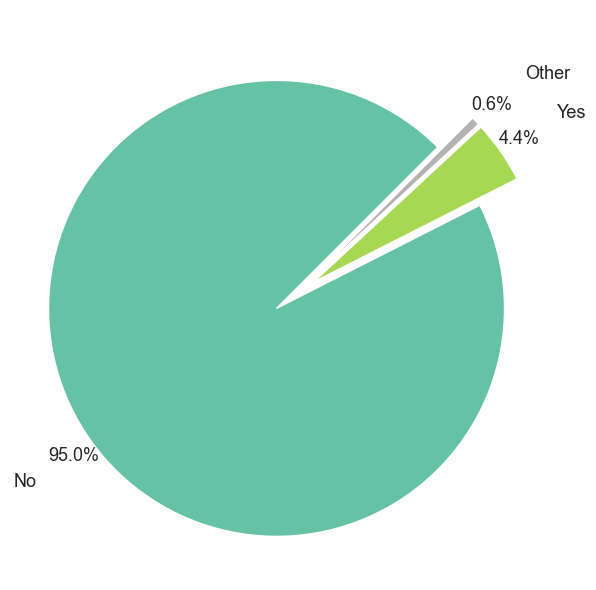

In [ ]:
covid_ef.plot.pie(y=feature, autopct='%1.1f%%', figsize=(8,6), fontsize=13,cmap='Set2',
                     startangle=45, explode =[0.1]*3, pctdistance=1.1,labeldistance=1.3,
                    textprops={'fontsize': 15})
plt.ylabel("")
plt.tight_layout()
plt.show()

Clearly, the impact on the field in Europe was minimal based on the sample that responded to the survey. However, it is crucial to conduct follow-up studies as the effects are delayed. Most job losses came after 2020, thus the need to analyze results after 2020.

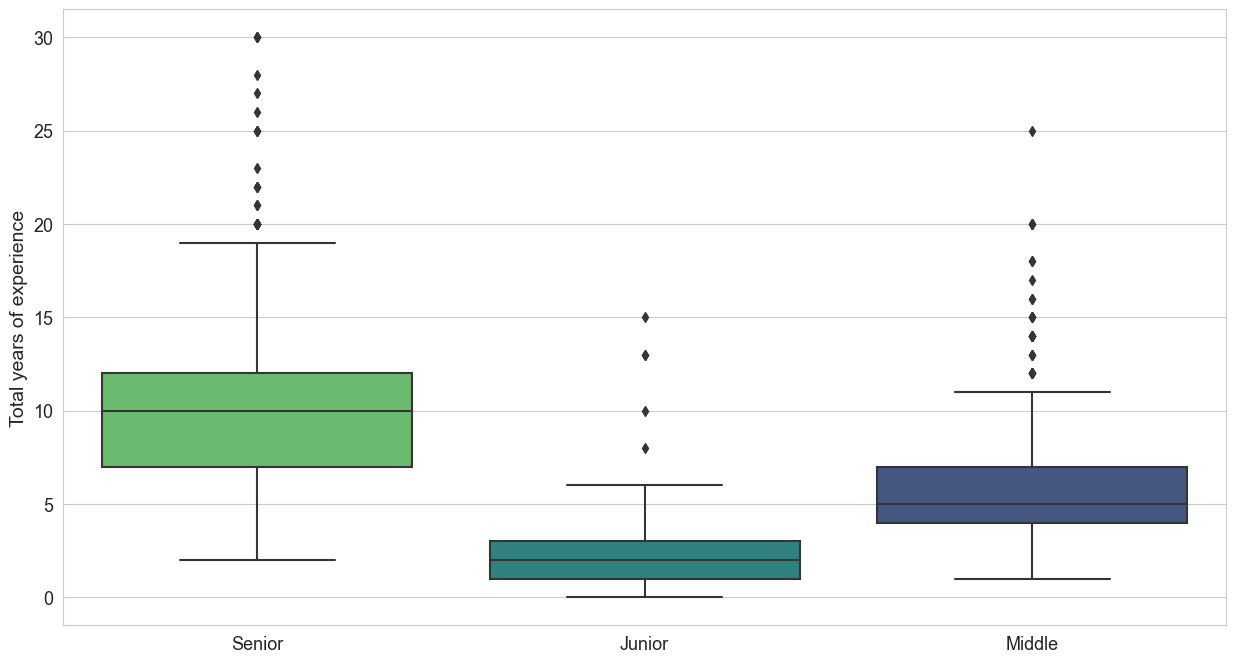

In [ ]:
#Years experience
new_df['Total years of experience'].value_counts()

total_experience = new_df.copy().dropna(subset=['Total years of experience'])
total_experience = total_experience[total_experience['Total years of experience'].str.isnumeric()]
total_experience['Total years of experience'] = total_experience['Total years of experience'].astype(int) 

plt.figure(figsize=(15,8))
sns.boxplot(data=total_experience[total_experience['Seniority level'].isin(['Senior','Junior','Middle'])],
           x='Seniority level',y='Total years of experience',palette='viridis_r')
plt.xticks(fontsize=13)
plt.xlabel("")
plt.yticks(fontsize=13)
plt.ylabel("Total years of experience",fontsize=14)
plt.show()

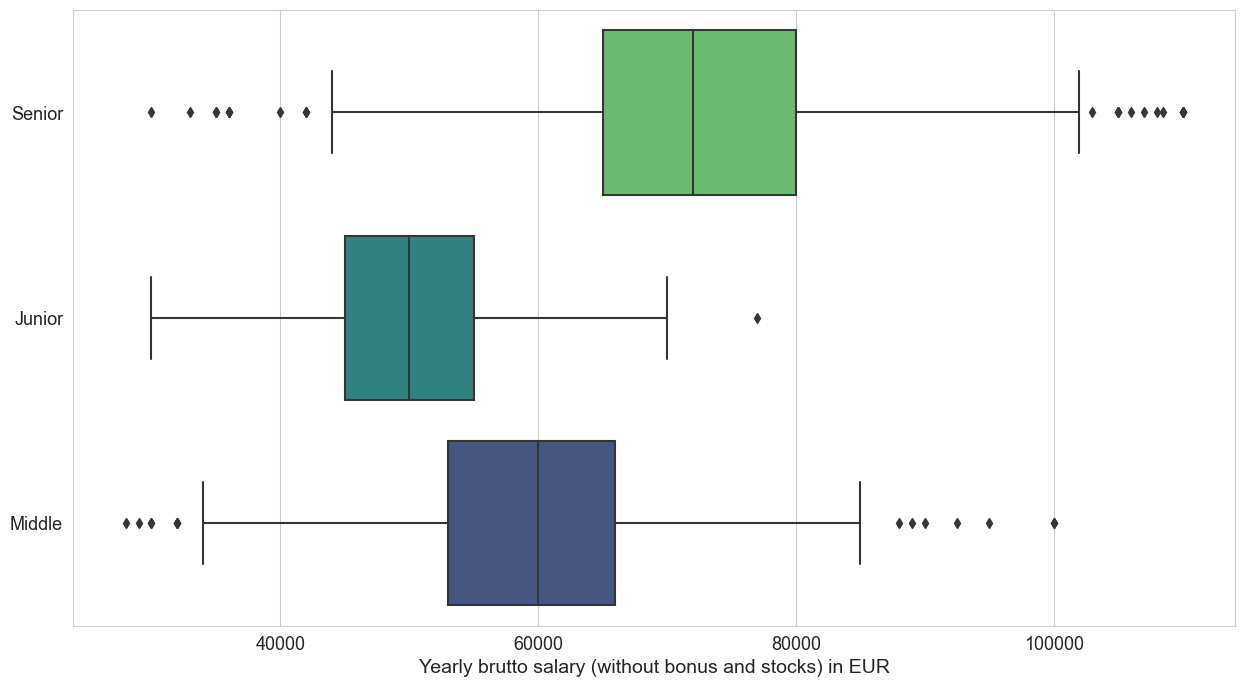

In [ ]:
#Seniority vs annual salary analysis
plt.figure(figsize=(15,8))
sns.boxplot(data=total_experience[total_experience['Seniority level'].isin(['Senior','Junior','Middle'])],
           y='Seniority level',x='Yearly brutto salary (without bonus and stocks) in EUR',palette='viridis_r')
plt.xticks(fontsize=13)
plt.xlabel("Yearly brutto salary (without bonus and stocks) in EUR",fontsize=14)
plt.yticks(fontsize=13)
plt.ylabel("")
plt.show()

The plots supports the assertion that the longer one has been in a profession the higher their pay. The same applies to the level of seniority. However, there seems to be a slight overlap between the juniors and middle level employees, with some juniors earnins same as those in middle level. This trait can be explained by different payscales by employers, with some paying higher or lower than the industry average

In [ ]:
#Language at the workplace
new_df['Main language at work'].value_counts()

English               961
German                177
Russian                 7
Spanish                 3
English and German      2
Italian                 2
50/50                   1
Czech                   1
French                  1
both                    1
Russian, English        1
Русский                 1
Name: Main language at work, dtype: int64

English is the most prevalent language across the respondents. This discovery shows that despite most of th erespondents being based in Germany, the main language used at work is English

In [ ]:
#Average earnings based on language at work
avr_language_sal = new_df['Yearly brutto salary (without bonus and stocks) in EUR'].groupby(
    new_df['Main language at work']).mean().sort_values(ascending=False)

avr_language_sal

Main language at work
both                  85000.000000
French                80000.000000
English               70251.770166
Russian               64342.857143
German                64157.062147
Russian, English      64000.000000
50/50                 55000.000000
Русский               48000.000000
English and German    45500.000000
Italian               43750.000000
Spanish               37333.333333
Czech                 36000.000000
Name: Yearly brutto salary (without bonus and stocks) in EUR, dtype: float64

Scheming through the data shows that only one respondent indicated 'both', showing that the above analysis could easily mislead the audience.